In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.image import extract_face_landmarks
import cv2
import csv
import time

In [8]:
video = cv2.VideoCapture('01-10.MOV')
_, frame = video.read()
out = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
out = cv2.resize(out, (180, 320))
out.shape
out = out.flatten()
out = np.array([out])

df = pd.DataFrame(out)

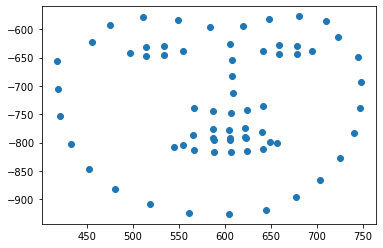

In [5]:
video = cv2.VideoCapture('01-10.MOV')
_, frame = video.read()
features = landmarks = extract_face_landmarks(frame)
plt.scatter(features[:, 0], -features[:, 1])

-2.4219956398010254


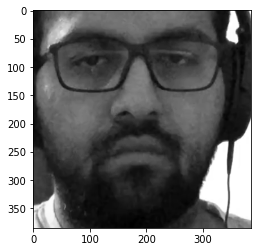

In [46]:
import face_recognition
locate = face_recognition.face_locations(frame)
x1, x2 = min(locate[0][0], locate[0][2]), max(locate[0][0], locate[0][2])
y1, y2 = min(locate[0][1], locate[0][3]), max(locate[0][1], locate[0][3])
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
cropped = gray[x1:x2, y1:y2]
plt.imshow(cropped, cmap='gray')

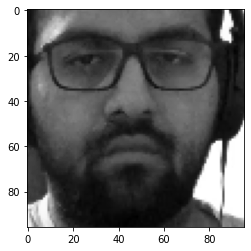

In [45]:
resize_crop = cv2.resize(cropped, (cropped.shape[0]//4, cropped.shape[1]//4))
plt.imshow(resize_crop, cmap="gray")

In [9]:
frame_num = 1
start = time.time()
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
for i in range(10):
    for _ in range(6):
        success, frame = video.read()
        frame_num+=1
    if (not success):
        break
    
    out = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    out = cv2.resize(out, (180, 320))
    out = out.flatten()
    
    elapsed = time.time() - start
    done = frame_num/total_frames
    estimate = int(elapsed/done - elapsed)
    
    print(f"Frame: {frame_num}/{total_frames} -- Estimated {estimate}s left", end='\r')
    df.loc[len(df.index)] = out

df.head()

KeyboardInterrupt: 

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,57590,57591,57592,57593,57594,57595,57596,57597,57598,57599
0,236,234,235,235,230,235,232,235,227,222,...,228,225,227,231,228,227,229,228,229,229
1,239,232,234,234,231,231,230,229,227,227,...,217,219,219,218,216,215,217,215,216,216
2,242,234,238,231,232,231,227,228,225,228,...,219,217,215,217,220,216,218,219,219,220
3,242,238,238,235,233,233,234,228,222,226,...,225,223,222,223,222,226,223,221,223,222
4,238,237,235,233,230,235,235,230,225,223,...,229,228,230,231,231,229,229,228,229,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,234,235,238,233,233,233,228,226,223,224,...,120,112,120,120,110,112,116,111,105,98
2998,241,239,239,235,231,232,233,231,228,226,...,115,120,121,112,116,114,109,108,108,96
2999,237,236,236,237,239,234,234,230,223,224,...,114,118,128,123,117,116,104,104,109,99
3000,240,235,238,235,232,235,231,230,229,220,...,118,120,119,111,130,119,117,112,107,95


In [9]:
start = time.time()
df.to_csv("01-10.csv", header=False)
print(time.time() - start)

In [1]:
start = time.time()
new_df = pd.read_csv("01-10.csv", header=None)
print(time.time() - start)
new_df

NameError: name 'time' is not defined